## POI Zipcode Station
This note is to find out the point of interest of the Citi Bike in the study area based on the zipcode.

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point, Polygon
from pyproj import Transformer
from pyproj import CRS
from geopandas import GeoDataFrame
from mpl_toolkits.basemap import Basemap

## POI Data

In [239]:
POI =  gpd.read_file("E:/SI/data/POI/Points Of Interest/geo_export_f5f9273e-1456-47e8-933b-0e1319177f23.shp")
POI = POI[['borough','faci_dom','facility_t','geometry']]
POI1 = POI[POI['borough']=='1']
POI3 = POI[POI['borough']=='3']
POI4 = POI[POI['borough']=='4']
POI = pd.concat([POI1,POI3,POI4])
POI

,borough,faci_dom,facility_t,geometry
0,1,9,6.0,POINT (-74.00702 40.72463)
3,1,8,6.0,POINT (-73.99194 40.70960)
11,1,8,6.0,POINT (-73.93314 40.81948)
17,1,9,6.0,POINT (-73.99914 40.75885)
20,1,8,6.0,POINT (-73.97581 40.71470)
...,...,...,...,...
20523,4,4,13.0,POINT (-73.83069 40.71630)
20525,4,4,7.0,POINT (-73.83216 40.76488)
20527,4,1,4.0,POINT (-73.76936 40.77201)
20554,4,2,2.0,POINT (-73.85888 40.75960)


In [240]:
POI.crs

<Geographic 2D CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...>
Name: WGS84(DD)
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: WGS84
- Ellipsoid: WGS84
- Prime Meridian: Greenwich

In [241]:
zipcode_shp = gpd.read_file("E:/SI/data/shapefile/ZIP_CODE_040114/ZIP_CODE_040114.shp")
zipcode_shp

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,10310,0,Staten Island,25003.0,5.346328e+07,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0,"POLYGON ((950767.507 172848.969, 950787.510 17..."
259,11693,0,Far Rockaway,11052.0,3.497516e+06,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1028453.995 167153.410, 1027813.010 ..."
260,11249,0,Brooklyn,28481.0,1.777221e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995877.318 203206.075, 995968.511 20..."
261,10162,1,New York,0.0,2.103489e+04,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((997731.761 219560.922, 997641.948 21..."


In [242]:
zipcode_shp.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- [east]: Easting (US survey foot)
- [north]: Northing (US survey foot)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [243]:
zipcode_area = {k:v for k,v in zip(zipcode_shp['ZIPCODE'].astype(int),zipcode_shp['AREA'])}
zipcode_area

{11436: 22699295.4594145,
 11213: 29631004.437939,
 11212: 41972104.0714198,
 11225: 23698630.1249252,
 11218: 36868798.9897562,
 11226: 39408598.2790117,
 11219: 42002738.4672304,
 11210: 47887022.9921604,
 11230: 49926703.3933172,
 11204: 43555184.613285,
 10471: 89651407.0583499,
 10470: 21543461.581388,
 10466: 55262490.6124597,
 10467: 69336166.3726341,
 10463: 3119701.91322087,
 10475: 38633296.9345436,
 10464: 11587953.826739,
 10469: 68040887.0683502,
 10468: 34447604.6722183,
 10458: 35968812.9033631,
 10034: 24503892.1220115,
 10033: 16156054.1719256,
 10462: 53022513.776471,
 10040: 16340742.7951967,
 10453: 25748509.2716743,
 10465: 108423743.438241,
 10461: 62824057.5745278,
 10457: 37640607.3793199,
 10460: 35155666.6460149,
 10032: 23159566.0923429,
 10452: 27550385.8533127,
 10456: 29933452.4363485,
 10472: 30963245.1883283,
 10031: 16902152.3659099,
 10039: 8419027.88460668,
 10459: 22551940.5372444,
 10451: 28944106.5168784,
 10473: 59522354.5402765,
 10030: 7757661.4

In [244]:
POI.to_crs(zipcode_shp.crs, inplace=True)
POI_with_zipcode = gpd.sjoin(POI,zipcode_shp,how='inner')
POI_with_zipcode = POI_with_zipcode[['borough','faci_dom','facility_t','geometry','ZIPCODE']]
POI_with_zipcode

,borough,faci_dom,facility_t,geometry,ZIPCODE
0,1,9,6.0,POINT (982304.992 203280.606),10013
283,1,8,6.0,POINT (980685.886 200636.808),10013
1328,1,10,11.0,POINT (982903.127 201640.324),10013
1449,1,8,4.0,POINT (982856.200 202431.854),10013
1665,1,3,11.0,POINT (982417.909 201454.094),10013
...,...,...,...,...,...
16053,4,4,5.0,POINT (1065311.507 214638.794),11005
17881,4,2,1.0,POINT (1063153.009 215143.645),11005
19014,4,1,10.0,POINT (1065262.931 214281.523),11005
19015,4,1,10.0,POINT (1065073.522 214008.259),11005


## Choose Study Area based on Zipcode
* station number >= 10 × N/S >= ? √
* in three year

In [245]:
station_2019 = pd.read_csv('E:/SI/data/Station/station2019_ZIPCODE.csv')
station_2020 = pd.read_csv('E:/SI/data/Station/station2020_ZIPCODE.csv')
station_2021 = pd.read_csv('E:/SI/data/Station/station2021_ZIPCODE.csv')

In [246]:
zipcode2019_counts = pd.DataFrame(station_2019.ZIPCODE.value_counts())
zipcode2019_counts.reset_index(inplace=True)
zipcode2019_counts.rename(columns={'index':'ZIPCODE','ZIPCODE':'Station Count'},inplace=True)
zipcode2019_counts['AREA'] = zipcode2019_counts.apply(lambda row: zipcode_area[row['ZIPCODE']],axis=1).tolist()
zipcode2019_counts['Ratio'] = zipcode2019_counts['Station Count']/zipcode2019_counts['AREA']*1000000
zipcode2019_counts = zipcode2019_counts[zipcode2019_counts['Ratio']>=0.5]
zipcode2019 = zipcode2019_counts['ZIPCODE'].tolist()
zipcode2019

[11201,
 11206,
 11231,
 11211,
 11222,
 10002,
 11221,
 11238,
 11237,
 11217,
 10029,
 10003,
 10011,
 11106,
 10009,
 10019,
 10001,
 10022,
 10016,
 11205,
 11216,
 10027,
 10013,
 10036,
 10014,
 10024,
 10025,
 10017,
 10035,
 11102,
 10028,
 10128,
 10012,
 10026,
 10065,
 10023,
 11249,
 10038,
 10004,
 10021,
 10018,
 10007,
 10010,
 10005,
 10075,
 10069,
 10280,
 11109,
 10115,
 10282,
 10281]

In [247]:
zipcode2020_counts = pd.DataFrame(station_2020.ZIPCODE.value_counts())
zipcode2020_counts.reset_index(inplace=True)
zipcode2020_counts.rename(columns={'index':'ZIPCODE','ZIPCODE':'Station Count'},inplace=True)
zipcode2020_counts['AREA'] = zipcode2020_counts.apply(lambda row: zipcode_area[row['ZIPCODE']],axis=1).tolist()
zipcode2020_counts['Ratio'] = zipcode2020_counts['Station Count']/zipcode2020_counts['AREA']*1000000
zipcode2020_counts = zipcode2020_counts[zipcode2020_counts['Ratio']>=0.5]
zipcode2020 = zipcode2020_counts['ZIPCODE'].tolist()
zipcode2020

[11201,
 11206,
 11231,
 11211,
 10002,
 11221,
 11222,
 11238,
 10019,
 10029,
 10003,
 10011,
 11237,
 11106,
 10009,
 11217,
 10001,
 10022,
 10013,
 10016,
 10025,
 10027,
 11216,
 10014,
 11205,
 10024,
 10036,
 11102,
 10017,
 10035,
 10023,
 10012,
 10028,
 10018,
 10026,
 10128,
 11249,
 10004,
 10007,
 10065,
 10005,
 10038,
 10021,
 10010,
 11251,
 10075,
 10020,
 10069,
 10281,
 10280,
 11109,
 10115,
 10282]

In [248]:
zipcode2021_counts = pd.DataFrame(station_2021.ZIPCODE.value_counts())
zipcode2021_counts.reset_index(inplace=True)
zipcode2021_counts.rename(columns={'index':'ZIPCODE','ZIPCODE':'Station Count'},inplace=True)
zipcode2021_counts['AREA'] = zipcode2021_counts.apply(lambda row: zipcode_area[row['ZIPCODE']],axis=1).tolist()
zipcode2021_counts['Ratio'] = zipcode2021_counts['Station Count']/zipcode2021_counts['AREA']*1000000
zipcode2021_counts = zipcode2021_counts[zipcode2021_counts['Ratio']>=0.5]
zipcode2021 = zipcode2021_counts['ZIPCODE'].tolist()
zipcode2021

[11201,
 11101,
 11215,
 10002,
 11206,
 10003,
 11231,
 10009,
 11222,
 11211,
 10014,
 11237,
 11238,
 11221,
 11217,
 10019,
 10029,
 10011,
 11106,
 10016,
 10013,
 10001,
 11103,
 10022,
 10027,
 10017,
 11216,
 10025,
 10024,
 11205,
 10036,
 11102,
 10012,
 10035,
 10128,
 10038,
 10023,
 11249,
 10026,
 10007,
 10018,
 10065,
 10028,
 10004,
 10010,
 10021,
 10005,
 11251,
 10075,
 10020,
 10069,
 10280,
 10006,
 11109,
 10115,
 10282,
 10281]

#### number>=5 （Abandon）
zipcode2019_counts = pd.DataFrame(station_2019.ZIPCODE.value_counts())
zipcode2019_counts = zipcode2019_counts[zipcode2019_counts['ZIPCODE']>=5]
zipcode2019 = zipcode2019_counts.index.values.tolist()
zipcode2020_counts = pd.DataFrame(station_2020.ZIPCODE.value_counts())
zipcode2020_counts = zipcode2020_counts[zipcode2020_counts['ZIPCODE']>=5]
zipcode2020 = zipcode2020_counts.index.values.tolist()
zipcode2021_counts = pd.DataFrame(station_2021.ZIPCODE.value_counts())
zipcode2021_counts = zipcode2021_counts[zipcode2021_counts['ZIPCODE']>=5]
zipcode2021 = zipcode2021_counts.index.values.tolist()

In [273]:
zipcode = []
for i in zipcode2019:
    if (i in zipcode2020) & (i in zipcode2021):
        zipcode.append(i)
# 除去争议地区
zipcode.remove(11109)
zipcode.remove(10035)
zipcode.remove(10004)

In [274]:
station_2019 = station_2019[station_2019['ZIPCODE'].isin(zipcode)]
station_2020 = station_2020[station_2020['ZIPCODE'].isin(zipcode)]
station_2021 = station_2021[station_2021['ZIPCODE'].isin(zipcode)]
station = pd.concat([station_2019,station_2020,station_2021])
station = station.drop_duplicates(subset=['latitude','longitude'])
station_points = station.apply(lambda row: Point(row.longitude ,row.latitude), axis=1)
station_points = gpd.GeoDataFrame(station, geometry=station_points)
station_points.crs = {'init':'epsg:4326'} # 确认经纬度有意义
station_points

c:\Users\HUAWEI\anaconda3\envs\test\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,station name,latitude,longitude,ZIPCODE,geometry
0,Pershing Square North,40.751873,-73.977706,10017,POINT (-73.97771 40.75187)
1,E 41 St & Madison Ave,40.752165,-73.979922,10017,POINT (-73.97992 40.75217)
2,E 47 St & 1 Ave,40.752069,-73.967844,10017,POINT (-73.96784 40.75207)
3,1 Ave & E 44 St,40.750020,-73.969053,10017,POINT (-73.96905 40.75002)
4,E 45 St & 3 Ave,40.752554,-73.972826,10017,POINT (-73.97283 40.75255)
...,...,...,...,...,...
956,Adams St & Prospect St,40.700763,-73.988698,11201,POINT (-73.98870 40.70076)
957,4455.1,40.688255,-73.995452,11201,POINT (-73.99545 40.68826)
1018,India St Pier,40.731734,-73.961239,11222,POINT (-73.96124 40.73173)
1019,Calyer St & Guernsey St,40.727558,-73.955059,11222,POINT (-73.95506 40.72756)


## Plot

c:\Users\HUAWEI\anaconda3\envs\test\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


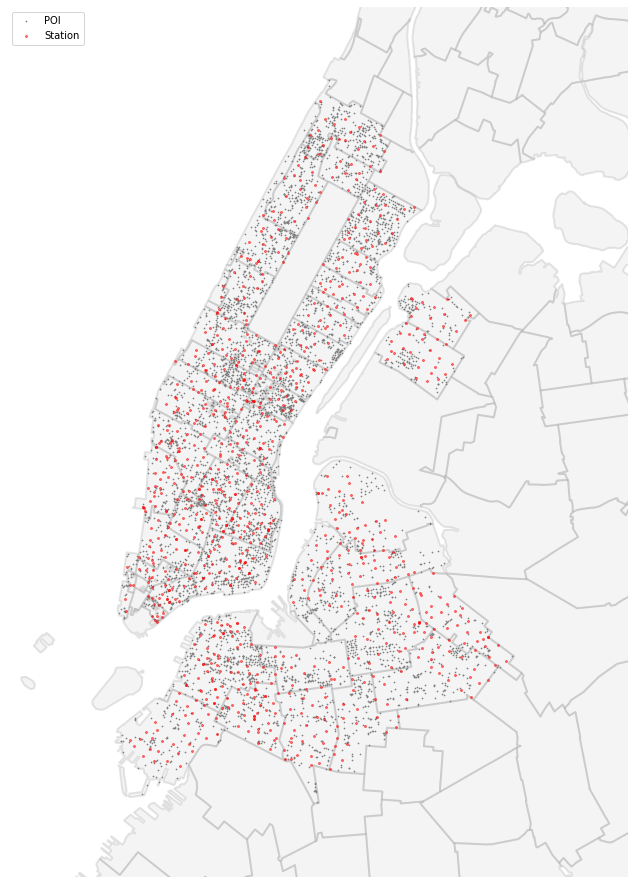

In [275]:
POI_with_zipcode = POI_with_zipcode[POI_with_zipcode['ZIPCODE'].astype(int).isin(zipcode)]
POI_with_zipcode.to_crs(zipcode_shp.crs, inplace=True)
station_points.to_crs(zipcode_shp.crs, inplace=True)
ax = zipcode_shp.plot(figsize=(24,16),color='#CCCCCC',edgecolor='grey',linewidth=2,alpha=0.2)
POI_with_zipcode.plot(ax=ax,marker='o',color='grey',markersize=0.5,label='POI',alpha=1)
station_points.plot(ax=ax,marker='o',color='r',markersize=4,label='Station',alpha=0.5)
ax.axis('off')
ax.set_xlim([970000,1020000])
ax.set_ylim([175000,245000])
ax.legend(loc='upper left')